In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os

print(os.getcwd())

/home/kkkzoz/Projects/oreo/benchmarks/cmd


In [7]:
# Replace this path with your actual CSV file path
file_path = './iot_benchmark_results.csv'

# Load the CSV data
data = pd.read_csv(file_path)
data.head()  # Display the first few rows for verification


,thread,operation,native,cg,oreo,native_p99,cg_p99,oreo_p99
0,8,1000,4.122288,14.170296,3.023824,34911,206335,27071
1,16,1000,2.060417,7.111645,1.540725,35231,206719,30047
2,32,1000,1.042973,3.622767,0.822357,35807,205695,35711
3,64,1000,0.527456,1.888801,0.437757,37439,202239,41887
4,96,1000,0.378289,1.323570,0.424096,37439,205951,49375


In [8]:
# Calculate Throughput for native, cg, and oreo
data['native_throughput'] = data['operation'] / data['native']
data['cg_throughput'] = data['operation'] / data['cg']
data['oreo_throughput'] = data['operation'] / data['oreo']
data.head()  # Display the data to verify the new throughput columns


,thread,operation,native,cg,oreo,native_p99,cg_p99,oreo_p99,native_throughput,cg_throughput,oreo_throughput
0,8,1000,4.122288,14.170296,3.023824,34911,206335,27071,242.583708,70.570157,330.707111
1,16,1000,2.060417,7.111645,1.540725,35231,206719,30047,485.338539,140.614449,649.045029
2,32,1000,1.042973,3.622767,0.822357,35807,205695,35711,958.797343,276.032094,1216.017465
3,64,1000,0.527456,1.888801,0.437757,37439,202239,41887,1895.893493,529.436354,2284.370762
4,96,1000,0.378289,1.323570,0.424096,37439,205951,49375,2643.484506,755.532249,2357.956244


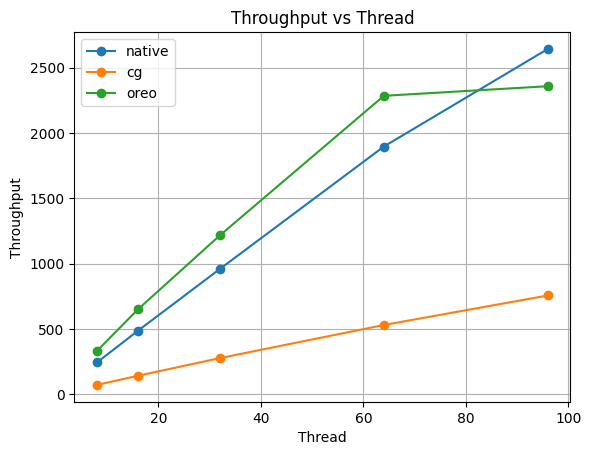

In [9]:
# Plot Throughput
plt.figure()
plt.plot(data['thread'], data['native_throughput'], label='native', marker='o')
plt.plot(data['thread'], data['cg_throughput'], label='cg', marker='o')
plt.plot(data['thread'], data['oreo_throughput'], label='oreo', marker='o')
plt.xlabel('Thread')
plt.ylabel('Throughput')
plt.title('Throughput vs Thread')
plt.legend()
plt.grid(True)
plt.show()


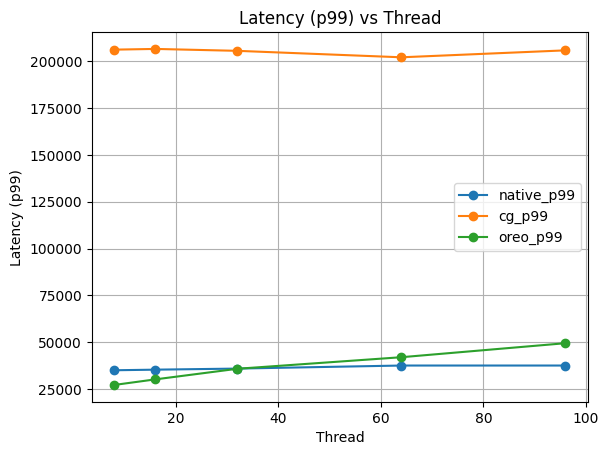

In [10]:
# Plot Latency
plt.figure()
plt.plot(data['thread'], data['native_p99'], label='native_p99', marker='o')
plt.plot(data['thread'], data['cg_p99'], label='cg_p99', marker='o')
plt.plot(data['thread'], data['oreo_p99'], label='oreo_p99', marker='o')
plt.xlabel('Thread')
plt.ylabel('Latency (p99)')
plt.title('Latency (p99) vs Thread')
plt.legend()
plt.grid(True)
plt.show()
